# Build your `Deep Convolutional Generative Adversarial Network (DCGAN)` for Deep Learning on Handwritten Digits `Image generation` Task


## Annotations in cell of this Notebook: 
 
<font color='red'>Read carefully the Annotations below to understand what to write in the Notebook and what to answer in the Course Shell.</font>
 
 `##` is the python comments for assignment requirements and/or descriptions to the code below.

`???` is the marker of the place that you should REPLACE with your own python code (either name of function[s], name of variable[s], expression[s], or a whole code line etc.), which should be able to be executed without errors. <strong>You may also find some inspirations from previous HomeWork assignment to write desired code for similar purpose/functionality </strong>

`##-Qx: ` is the numbered identifier to indicate the question you should answer in the Course Shell for this homework. For example    `##-Q1: ` and `##-Q6: ` .   

[`clickable link`]() is some tip/hint resources you many refer to in addition to your learning resources from this course or your self explorations.  
    
 

## Task Overview 
<img src="https://miro.medium.com/max/1400/1*N3nT9AXVnsFBta2R1eEMjg.png" width="500">
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　<strong>A Task Schema Diagram</strong>
                                              
Generative Adversarial Networks (GANs) is a framework to train generative models, such as deep convolutional neural networks for generating images. GAN composed of two models which are trained simultaneously by an adversarial process. A generator model ("the artist") learns to create fake images that look real, while a discriminator model ("the art critic") learns to tell real images apart from fakes. 

During training, the generator progressively becomes better at creating images that look real, while the discriminator becomes better at telling them apart. The process reaches equilibrium when the discriminator can hardly distinguish real images from fakes.

For a simple GAN the generator is build as a simple fully connected network. The generator of a Deep Convolutional Generative Adversarial Network (DCGAN) are mainly composes of convolution layers without max pooling with convolutional stride and transposed convolution (Fractionally-strided convolution or Deconvolution) for the downsampling and the upsampling of 2D images.  
 

You will conduct a `Image generation` task, by `building` a DCGAN architecture with Python to generate `fake images` from random `noise input`, that after proper `training` of the model it would look like images of `real handwritten digits`. 

The `TensorFlow 2.x` platform and its integrated version of `Keras API` (versus the traditional Keras Package) should be the handy tools for you to complete this task. Please take advantage of the official well supported TensorFlow & Keras [`Help Documentations`](https://www.tensorflow.org/api_docs/python/tf/keras) for correct usages of the API and functions. 


In [1]:
## Import related Modules for TensorFlow framework and Keras API
   

## import the TensorFlow and give it alias "tf" 
import tensorflow as tf


## import the `Keras` API from TensorFlow 
from tensorflow import keras

##-Q1: copy your composed code in the line above to answer corresponding question in the Course Shell


## import the namespace "layers" and "optimizer" of Keras from Tensorflow 
##   - use comma and exactly one space to seperate each namespace
# from tensorflow.keras import layers, optimizer
from keras import layers, optimizers
##-Q2: copy your composed code in the line above to answer corresponding question in the Course Shell


## import the Numpy package and give it alias "np" 
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
## Record the starting time of runing DCGAN project
## Create a image folder to store generated fake images for every interval during training
import os
from datetime import datetime
datetime_now = datetime.now()
print(f"DCGAN Project starts at {datetime_now}")
datetime_now = datetime_now.strftime("%Y%d%m_%H%M%S")
if os.path.exists('dcgan_fake_images'):       
    os.rename("dcgan_fake_images", f"dcgan_fake_images_{datetime_now}")    
    os.makedirs('dcgan_fake_images')
else:        
    os.makedirs('dcgan_fake_images')

DCGAN Project starts at 2023-06-03 00:04:15.152998


## Prepare Dataset 

### The Image Dataset of MNIST Handwritten Digits - Introduction 

The [`MNIST`](http://yann.lecun.com/exdb/mnist/) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is widely used for training and testing Deep Learning Models.

The images in the dataset contains small square images with pixels in grayscale, and each image present a real handwritten single digits between 0 and 9.  

The image genration task is to generate fake images out of noise inputs and have the fake images looks like a handwritten digit.

### Load Data

Load the MNIST dataset distributed with Keras.
  

In [3]:
## Load the MNIST data from the Keras in Tensorflow framework
mnist_data = keras.datasets.mnist
  
## We will only use the images to train the DCGAN, so use '_' to replace other variable locations
##   Since we are not trying to train model to classify into correct labels 
##   We only need to identify if a image is real or fake as 1 or 0
## replace ONLY the '???' in the code line below:
(images_train, _),(_, _) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###  Explore Data

In [4]:
## Find out the datatype, dimensions, and min/max value (i.e. value range) of the loaded data `images_train` 
## Feel free to explore all aspects that could help you understand the data


print("Data Types:  ", images_train.dtype)
print("Shape / Dimensions of Data :", images_train.shape)
print("Min:", np.min(images_train), "\n Max: ", np.max(images_train))

Data Types:   uint8
Shape / Dimensions of Data : (60000, 28, 28)
Min: 0 
 Max:  255


In [5]:
## Define a function for visualizing some images
def images_show(images, dim=(1,6), figsize=(12,6), num_postfix=-1):
    plt.figure(figsize=figsize)
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], cmap='Greys_r', interpolation='nearest')
        plt.axis('off') 
    plt.savefig(f'dcgan_fake_images/fake_images_iter_{num_postfix:05d}.png') 
    plt.pause(0.1)

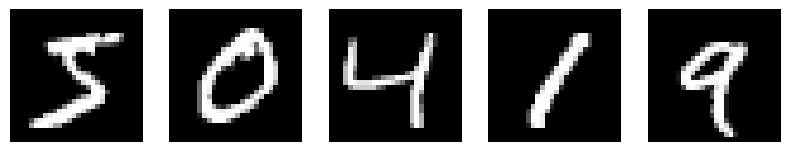

In [6]:
## Call the function images_show to show first 6 images in the loaded data, i.e. images_train

loaded_image_samples = images_show(images_train[:5])
loaded_image_samples  

##-Q3: What are the code you should put in place of the ??? in the above code line to fulfill its purpose of design (requirements in the code comment)? 


### Preprocess data

In [7]:
## To faciliate the model training, we would preprocess to normalize and reshape the images

def images_preprocess(images):
    ## Normalize the input images to the range of [-1, 1] 
    images = images / 127.5 - 1
    
    ## Convert dimension of all grayscale images to be enforce to have a color channel in its dimensions
    ##   i.e. convert origianl 3D tensor (number_of_data, image_height, image_width) of `images_train`
    ##        to 4D tensor by adding the addiontal dimension as the color channel
    ##   - fill in only the number values to replace the ??? below:

    # I'm assuming color channel here means grayscale so 1, but if not then make the 1 a 3. 
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1).astype('float32')   

    ##-Q4: What are the number values you should put in place of the ??? in the above code line to fulfill its purpose of design (requirements in the comment)? 
    
    return images

## Use the function images_preprocess to preprocess the loaded data `images_train`  
images_preprocessed = images_preprocess(images_train) 
##-Q5: What are the code you should put in place of the ??? in the above code line to fulfill its purpose of design (requirements in the comment)? 
    

### Prepare dataset

In [8]:
## Prepare dataset from the preprocessed image data by shuffle and batch 

## set parameter BUFFER_SIZE as the total number of images in the loaded data `images_train`

BUFFER_SIZE = images_train.shape[0] # TODO: Check if this is right.
    
## set parameter BATCH_SIZE as 64
BATCH_SIZE = 64

## create dataset for real images 
images_data = tf.data.Dataset.from_tensor_slices(images_preprocessed)
def get_dataset_real(dataset, buffer=BUFFER_SIZE, batch=BATCH_SIZE, drop_remainder = True):
    ## Shuffle and Batch to prepare the dataset for real images
    dataset = dataset.shuffle(buffer).batch(batch, drop_remainder = drop_remainder).prefetch(1)
    return dataset

In [9]:
## create noises for generating fake images during the training stage
 
## use a 1D random vector as the noise input 
##   for the generator model to create one fake image later 
## Set the dimension of the vector (i.e. NOISE_SIZE) as 100 
##   i.e. the number of input 
NOISE_SIZE = 100

## create a batch of random vectors that each is in the range of [-1, 1] (as noises)  
##   i.e. random vectors for one batch
def get_noise_one_batch(batch_size=BATCH_SIZE, noise_size=NOISE_SIZE):
    noice_one_batch = np.random.uniform(-1, 1, (batch_size, noise_size))
    return noice_one_batch


## Build architecture of your DCGAN model

DCGAN is based on GAN, which composed of two models in neural networks:

- The first model is called a **Generator** and it aims to generate new data similar to the real one. In DCGAN it would generate an unexisted image that we call fake image for this project. 

- The second model is named the **Discriminator** and it aims to recognize if a data is ‘real’ — belongs to the original dataset; Or if it is ‘fake’ — generated by a forger. Whose output is a binary 1 or 0.



The basic building block of neural network is the layer. 
You will configure each layer of your model, then compiling the model.



<br>

For this task you are required to chain together layers as the architecture of the DCGAN. 

**Besides the layers you've already practiced and familiared with** in the **previous assignments** (E.g. **Dense, Convolutional, Flatten** layers etc.), 

the following  [**new types of layers**](https://www.tensorflow.org/api_docs/python/tf/keras/layers) might also needed in this task. Their API references listed below (as how to apply their corresponding **parameters** to configure the layer) might provide you more inspirations.

- [Reshape](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape)

- [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)

- [LeakyReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU)


 

 




### Build the Generator Model


This Generator Model will receive noise vectors as inputs, and generated fake images as output;

A vector in the inputs would be converted and upsampled several times until reaching the same size of a real image.  

In [10]:
## Build a Generator model by stacking keras layers sequentially  
 
generator = keras.Sequential([        
##-Q6: What is the function name that you should put in place of the ??? in the above code line to fulfill its purpose of design (requirements in the comment)? 

    ## *** READ *VERY CAREFULLY* Below What is DESCRIBED and REQUIRED to be FULFILLED *** 
    
    ## Apply a fully-connected layer WITH bias, 
    ##   to receive and feature mapping the input, i.e. the noice vector
    layers.Dense(7*7*128, input_shape=(NOISE_SIZE,), use_bias=True),
       
    ##-Q7: What are the code that you should put in place of the ??? in the above code line to fulfill its purpose of design (requirements in the comment)? 
    
    ## Add a Reshape layer to change the output from previous 1D input layer into 3D 
    ##   which has 7X7 as size of generated 2D latent image 
    ##   with 128 features in the 3rd dimension
    layers.Reshape([7, 7, 128]), 
    
    ## Build a transposed convolution layer WITHOUT bias 
    ##      to do inversed convolution as a way to do learnable Upsampling;
    ##   which has number of filters that equals to HALF of the 
    ##      feature dimension of the output from previous layer; 
    ##   5 X 5 as the kernel size;
    ##   stride step as 2 for all of its spatial dimensions; and 
    ##   padding with zeros evenly to the surroundings of the input. 
    layers.Conv2DTranspose(3136, (5, 5), strides=(1, 1), padding='valid', use_bias=False),
    ##-Q8: What are the code that you should put in place of the ??? in the above code line 
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
    
    ##-Q9: After upsampling by transposed convolution layer with the required parameter configurations,
    ##      What is the dimension of the 2D latent image that was 7X7 output from previous layer? 
    # 7X7X64
       
    
    ## Add a Batch Normalization layer which would stabilize the learning procedure
    ##   by standardizing activations from the prior layer to 
    ##   have normal distribution with the mean value of 0 and unit variance  
    layers.BatchNormalization(),  
    
    ## Add a layer of Leaky ReLU activation function with alpha being 0.2, 
    ##   which still allow some negative value to pass through the network for continue learning
    ##   even if it is negative, by multiply which with alpha     
    layers.LeakyReLU(alpha=0.2), 
    
    
    
    ## Build a transposed convolution layer WITHOUT bias;
    ##   which has number of filters that equals to HALF of the 
    ##      feature dimension of the output from previous layer; 
    ##   3 X 3 as the kernel size; 
    ##   stride step as 2 for all of its spatial dimensions; and 
    ##   padding with zeros  evenlyto the surroundings of the input. 
    ## ???.???(???, (???, ???), strides=(???, ???), padding='???', use_bias=???),
    layers.Conv2DTranspose(1568, (5, 5), strides=(2, 2), padding='valid', use_bias=False),
    ##-Q10: What is the code line that you should put in place of the ??? line in the above  
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
    ##   - use exactly only one space when needed, use only exactly one space after comma when comma is needed
       
    ##- Think about : After upsampling by this transposed convolution layer with the required parameter configurations,
    ##      What is the dimension of the 2D latent image that was output from its previous layer? 
    # 7X7X32
    
    ## Add a Batch Normalization layer  
    layers.BatchNormalization(),  
    
    ## Add a layer of Leaky ReLU activation function with alpha being 0.2, 
    layers.LeakyReLU(alpha=0.2), 
       
    ## Build a transposed convolution layer WITHOUT bias;
    ##   which has a number of filters 
    ##      that would make the output, i.e. the generated image, 
    ##      to have only 1 feature dimension, i.e. 1 color channel
    ##   3 X 3 as the kernel size; 
    ##   SET stride step as a PROPER number 
    ##      that would make the output, i.e. the generated image, 
    ##      to have its first 2 dimensions (i.e. height and width), same as the loaded mnist real image
    ##      i.e. the generated image in same image size as the real image.        
    ##   padding with zeros evenly to the surroundings of the input;
    ##   and CHOOSE an activation function that could make 
    ##      the range of output fake image's pixel values the SAME as preprocessed real iamge 
    ##      i.e. a range in [-1, 1]  
    layers.Conv2DTranspose(1, (4, 4), strides=(1, 1), padding='valid', use_bias=False, activation='tanh'),
    ##-Q11: What are the code that you have put in place of the 1st,2nd,3rd and 6th ??? in the above code line 
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
 
    ## A following Reshape layer is to make sure the output fake image has same dimensions as the real images.
    ##   - if error occurs (dimension not match) it may suggest you to check if the previous layer configuration (e.g. strides) is correct
    layers.Reshape([28, 28, 1])
])

## suggestion: take a look at your model's architecture by printing it out 
##   and think it through about how the transposed convolution generate the final image through upsampling 

### Build the Discriminator Model


This Discriminator Model in DCGAN is basically a normal **CNN*** (So you could **recall how you build your CNN model in previous assignment**) that can be trained for binary classification, to identify real or fake images. 

The Discriminator Model will receive images as inputs, and binary values 1 or 0 as the outputs, representing the classification of the input images to be real or fake. 

In [11]:
# Implementing a keras binary activation functiono
from keras import backend as K

def binary_activation(x):
    # Threshold the input and return binary values
    return K.cast(K.greater(x, 0.0), K.floatx())

In [12]:
## set the input dimension for Discriminator Model
##   to the image shape in the tensor format (image_height, image_width, color_channels)
image_dim = (28, 28, 1)


# Build a tf.keras.Sequential model by stacking layers

discriminator = keras.Sequential([      
    ## Build a Convolutional layer that 
    ##   `input_shape` equal to the image dimention,  
    ##   has 64 filters, 
    ##   5 X 5 as the kernel size, 
    ##   stride step as 2,and 
    ##   padding with zeros evenly to the surroundings of the input.     
    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), input_shape=image_dim, padding='valid'),
    
    ##-Q12: What is the code line that you should put in place of the ??? line in the above  
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
    ##   - use exactly only one space when needed, use only exactly one space after comma when comma is needed
       
    
    ## Add a layer of Leaky ReLU activation function with alpha being 0.2, 
    layers.LeakyReLU(alpha=0.2), 
    
    ## Add a Droupout layer to reduce overfitting     
    ##   and set the rate to be 0.3 of the input units for dropping out  
    layers.Dropout(0.3),
    
    
    ## Build a Convolutional layer that   
    ##   has 128 filters, 
    ##   3 X 3 as the kernel size, 
    ##   stride step as 2,and 
    ##   padding with zeros evenly to the surroundings of the input.
    layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='valid'),

    ## Add a layer of Leaky ReLU activation function with alpha being 0.2, 
    layers.LeakyReLU(alpha=0.2), 
    
    ## Add a Droupout layer to reduce overfitting     
    ##   and set the rate to be 0.3 of the input units for dropping out  
    layers.Dropout(0.3),
    
    
    ## Build a Convolutional layer that   
    ##   has 256 filters, 
    ##   3 X 3 as the kernel size, 
    ##   stride step as 2,and 
    ##   padding with zeros evenly to the surroundings of the input.
    ## Add a layer of Leaky ReLU activation function with alpha being 0.2, 
    ## Add a Droupout layer to reduce overfitting     
    ##   and set the rate to be 0.3 of the input units for dropping out  
    layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='valid'),
    layers.LeakyReLU(alpha=0.2), 
    layers.Dropout(0.3),
    
    
    ## Biuld A Flatten layer to flatten the input  
    layers.Flatten(),
    ##-Q13: What is the code line that you should put in place of the ??? line in the above  
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
    ##   - use exactly only one space when needed, use only exactly one space after comma when comma is needed
       
    
    ## Apply a `full-connected` output layer 
    ##   with a unit number that can output a binary value;
    ##   - choose a proper activation function 
    ##      for this goal of *binary output* (binary classification task)    
    layers.Dense(units=1, activation='sigmoid')    
    ##-Q14: What are the code that you should put in place of the ??? in the above code line 
    ##     to fully fulfill its purpose of design (requirements in its above comments)? 
 
])


## suggestion: take a look at your model's architecture by printing it out 
##   and think it through as well as compare with your previous CNN model 

##### Compile Discriminator Model first 

Before the model is ready for training, it needs a few more settings. These are to be added during the [model's compiling](https://www.tensorflow.org/api_docs/python/tf/keras/Model) step:

- [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) : This is how the model is updated based on the data it sees and its loss function.
- [Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. 

Choose your optimizer:

In [13]:
## Set your optimizer for compiling the models later
## Select an optimizer that implements the Adam algorithm, 
##   and validate to decide a proper learning rate for your model 
my_optimizer = optimizers.Adam()

##-Q15: What are the code line that you should put in place of the ??? in the above code line 
##     to fully fulfill its purpose of design (requirements in its above comments)? 
 

Compile Discriminator Model:

In [14]:
## Compile the Discriminator model with your chosen optimizer, 
##   and use Binary cross-entropy as losses, 
discriminator.compile(optimizer=my_optimizer,
        loss=keras.losses.binary_crossentropy
       )                     

##-Q16: What are the code that you should put in place of the ??? in the above code line 
##     to fully fulfill its purpose of design (requirements in its above comments)? 

 
### Build the DCGAN Model


Build the DCGAN by concatenating the Generator and Discriminator into one sequential.

The DCGAN Model will receive noise vectors as inputs, and a binary values 1 or 0 as the outputs, representing the classification of the input images to be real or fake.

The Generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the Discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples. 

In [15]:
## make discriminator not-trainable as of now
discriminator.trainable = False

## Combine both Generator and Discriminator Models
dcgan = keras.Sequential([     
    generator,   
    discriminator      
])


##-Q17: What is the `total number` of params (i.e. weights) , 
##      including the Non-trainable params e.g. from the Discriminator part, 
##      in the whole DCGAN Model build above?
##      be careful in the calculations, For example. with or without bias. 

##### Compile DCGAN  

And then compile the whole DCGAN 

In [16]:
## Compile the DCGAN model as a whole with your chosen optimizer, 
##   and use Binary cross-entropy as losses, 
dcgan.compile(optimizer=optimizers.Adam(),
              loss=keras.losses.binary_crossentropy)

## Train the model

Train the DCGAN to improve the ability of generating good fake images by the Generator.

Prepare 6 random noice vectors, to check and compare how the generated fake images on same 6 inputs are improved over the training procedure.


1/1 [==============================] - 12s 12s/step


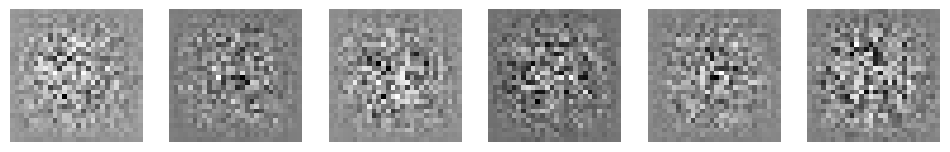

In [17]:
## create random noice inputs to checking the corresponding generated fake images 

## create random noise inputs of 6
##    which will be later used for comparison of the generated images
##    on these same sample noises during the training 
noise_inputs_check = get_noise_one_batch(6)  
## generate the initial output images before training
images_outputs_check = generator.predict(noise_inputs_check)

## Show the 6 generated images: 
images_show(images_outputs_check, num_postfix=-1) 

##### Train Discriminator Model and DCGAN Model  

In each training loop, the Discriminator Model is first trained to better classify real images (drawn from the real image dataset ) and fakes images (produced by the Generator Model based on random noice as input). 

The Discriminator in DCGAN was first marked as not trainable to train only weights of layers in the Generator of DCGAN Model to help better generate fake images like real. 

In [18]:
## Define training parameters  

## set epochs size/count 
##  it is assigned a initial value 1 TEMPORARILY, you need to replace it to your tunned value eventually.
EPOCHS = 1   ### 1 is a temporary value that you need to update before submitting 


## Calculated the Number of batches based on the loaded data `images_train`  and the size of a batch
BATCHS = np.floor(BUFFER_SIZE/BATCH_SIZE).astype('int')

## Set the interval as 300 
##   to show generated images by the Generator trained so far in the training procedure
##   on the same 6 noise vector inputs.
##   i.e. Display every 300 iterations the 6 generated fake images as training keeps improving it
iter_interval = 300

## Define binary labels that represent real and fake outputs for each batch training
labels_real = np.ones((BATCH_SIZE, 1))
labels_fake = np.zeros((BATCH_SIZE, 1))


###  <font color='red'>NOTICE:</font>
 
<font color='red'>Depending on your EPOCHS count, your computer computation capability, etc. the training procedure could take HOURS </font>

You could temporarily replace the variable name `EPOCHS` in the below code cell to be a small value for testing.  After tunning all other parameters above this cell, you can then replace that small value back to the original variable name `EPOCHS`, so your setting on the `EPOCHS` in the above code cell could take effect.

For example, if you replace　　`for epoch in range(0, EPOCHS):`　　to be　 　`for epoch in range(0, 1):`　　
     
and execute the below code cell, the DCGAN will only be trained for 1 epoch for all the batches, and stop there.

<br>

After that you can keep manually changing it to be 　　`for epoch in range(1, 2):`
     
and execute the below code cell again (without needing to restart the whole notebook), the DCGAN will keep beeing trained for the 2nd epoch, and the training will continue based on the parameters already learned from the 1st epoch.

As long as your computer, Jupyter notebook local server, and this .ipynb, are not colsed, you should be able to keep on the training procesure, instead of training all over again. 

For example if you want to run the 3rd epoch, then keep manually change it to be 　　 `for epoch in range(2, 3):` 

then the model will continued to be trained upon the parameters learned from the 2nd epoch

<br>
     
This way of manually start the next epoch round could let you have more controls on the tunning or debugging, and have a better idea how many epochs your model would eventually need. 　Note re-run the below cell will overwrite the output so you won't be able to see the image plots generated from previous epoch, but you can always go into your image subfolder to inspect.

After you tunned to decide a satisfied epoch count (as well as other parameters), then you can assign that value to the variable `EPOCHS` in the above code cell, and change the bellow cell back to `for epoch in range(0, EPOCHS):`, and save the .ipynb before colse and halt it, then reopen the .ipynb to have a full run-from-beginning, to complete this assignment for the submission.
 

In [ ]:
## Start Model Training in the iterations

## Record the Starting time of runing DCGAN training
datetime_now = datetime.now()
print(f"~~~ DCGAN training starting at {datetime_now} \n\n ")  

for epoch in range(0, EPOCHS): 
    ## generate new dataset of real images for each epoch
    real_dataset = get_dataset_real(images_data)
    
    for batch, images_real in enumerate(real_dataset):
        ## Train Discriminator seperately:
        
        ## Make Discriminator Trainable for now
        ##   i.e.set the Discriminator Model trainable to be trained on real and fake images
        discriminator.trainable = True

        ## Batch Train Discriminator Model on a batch of real images with them labeled as real 
        d_loss_real = discriminator.train_on_batch(images_real, labels_real)
        
        ## create a random noise batch inputs and pass which into the Generator to generate fake images
        noise_inputs = get_noise_one_batch()
        images_fake = generator.predict(noise_inputs)
                          
        ## Train Discriminator Model on a batch of fake images with them labeled as fake 
        d_loss_fake = discriminator.train_on_batch(images_fake, labels_fake)    
        ## Train DCGAN model     
        
        ## Make Discriminator Not-trainable for now
        ##   i.e. set the Discriminator Model NOT trainable 
        ##        to only update layer weights of Generator            
        discriminator.trainable = False
        ##-Q18: What is the code line that you should put in place of the ??? in the above line 
        ##     to fully fulfill its purpose of design (requirements in its above comments)? 
        
        ## create a random noise batch inputs and pass which into the DCGAN later
        noise_inputs = get_noise_one_batch()
        
        ## Batch Train DCGAN Model on a batch of noise inputs with them labeled as real 
        ##   to fool the Discriminator with the fake images generated by Generator but labeled as real
        dcg_loss = dcgan.train_on_batch(noise_inputs, labels_real) 
        ##-Q19: What is the code line that you should put in place of the ??? in the above line 
        ##     to fully fulfill its purpose of design (requirements in its above comments)? 
    
        ## Print training progress with model losses  on the intervals  
        ##   and Show fake images generated on same 6 noise inputs 
        ##            which are also saved in the folder for comparison later
        iteration = (epoch * BATCHS) + (batch + 1)  

        if iteration % 5 == 0:
            print(f"=== Iter: {iteration} : d_loss_real: {d_loss_real:.9f}, d_loss_fake: {d_loss_fake:.9f}, dcg_loss: {dcg_loss:.9f} - in Epoch {epoch + 1}/{EPOCHS} - Batch {batch+1}/{BATCHS}")

        if iteration % iter_interval == 0: 
            images_check = generator.predict(noise_inputs_check)
            images_show(images_check, num_postfix=iteration)
            print("*** time now: ", datetime.now()) 
            
## Record the Ending time of runing DCGAN training
datetime_now = datetime.now()
print(f"\n\n ~~~ DCGAN trainging ends at {datetime_now}")  

~~~ DCGAN training starting at 2023-06-03 00:04:38.188146 

 
2/2 [==============================] - 53s 28s/step
